## Predict Early Complication within 30 days After Gastic Cancer Surgery
### Date : 220423

### 1. Library Import

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
os.getcwd()

In [2]:
df = pd.read_csv('/Users/jun/Library/CloudStorage/OneDrive-개인/clinical db stomach/ML/early_complication_detection.csv',encoding = 'ISO-8859-1')
df = df[['Sex','Age_grp','ASA_Score_nm','Smoking','Drinking','BMI_calc_grp2','Ass_condition_HT','Ass_condition_DM','n_Ass_condition_grp2','Ass_lesion','Clinical_Stage_nm','fStage_grp_nm','Operation_nm','Location_nm','Histology_nm','Lauren_nm','Reconstruction_nm','LN_Dissection_nm','Combined_Resection_nm','Intraop_cc','Hemoglobin_status','Neutrophil_count_status','Z_EBL','OP_time','Platelets','Albumin','Cell_Count','Early_CC_YN']]

### 2. Change encodeing for each variables

In [3]:
#df['Sex'] = df['Sex'].replace('M',1)
#df['Sex'] = df['Sex'].replace('F',0)

df['Age_grp']=df['Age_grp'].replace('1 <50',"mid")
df['Age_grp']=df['Age_grp'].replace('2 50-69',"old")
df['Age_grp']=df['Age_grp'].replace('3 70+','oldold')

#df['ASA_Score_nm']=df['ASA_Score_nm'].replace('1-2',1)
#df['ASA_Score_nm']=df['ASA_Score_nm'].replace('3-4',2)

#df['Smoking']=df['Smoking'].replace('Yes',1)
#df['Smoking']=df['Smoking'].replace('No',0)

#df['Drinking']=df['Drinking'].replace('Yes',1)
#df['Drinking']=df['Drinking'].replace('No',0)

df['BMI_calc_grp2']=df['BMI_calc_grp2'].replace('1 <18.5','under')
df['BMI_calc_grp2']=df['BMI_calc_grp2'].replace('2 18.5-24.9','normal_preobe')
df['BMI_calc_grp2']=df['BMI_calc_grp2'].replace('3 >25','obe')


df["Ass_condition_HT"] = df["Ass_condition_HT"].replace(1,'Yes')
df["Ass_condition_HT"] = df["Ass_condition_HT"].replace(0,'No')

df["Ass_condition_DM"] = df["Ass_condition_DM"].replace(1,'Yes')
df["Ass_condition_DM"] = df["Ass_condition_DM"].replace(0,'No')


df['n_Ass_condition_grp2']=df['n_Ass_condition_grp2'].replace('0','zero')
df['n_Ass_condition_grp2']=df['n_Ass_condition_grp2'].replace('1','one')
df['n_Ass_condition_grp2']=df['n_Ass_condition_grp2'].replace('2','two')
df['n_Ass_condition_grp2']=df['n_Ass_condition_grp2'].replace('3+','above_three')

df["Ass_lesion"] = df["Ass_lesion"].replace(1,'Yes')
df["Ass_lesion"] = df["Ass_lesion"].replace(0,'No')


#df['Clinical_Stage_nm']=df['Clinical_Stage_nm'].replace('1-2',1)
#df['Clinical_Stage_nm']=df['Clinical_Stage_nm'].replace('3-4',2)

#df['fStage_grp_nm']=df['fStage_grp_nm'].replace('1-2',1)
#df['fStage_grp_nm']=df['fStage_grp_nm'].replace('3-4',2)

#df['Operation_nm']=df['Operation_nm'].replace('Total Gastractomy',1)
#df['Operation_nm']=df['Operation_nm'].replace('Partial Gastractomy',2)

df['Location_nm']=df['Location_nm'].replace('1 Lower','low')
df['Location_nm']=df['Location_nm'].replace('2 Middle','mid')
df['Location_nm']=df['Location_nm'].replace('3 Upper','up')
df['Location_nm']=df['Location_nm'].replace('4 Others','other')

df['Histology_nm']=df['Histology_nm'].replace('01. Well/Moderately differentiated','well_mode')
df['Histology_nm']=df['Histology_nm'].replace('02. Poorly differentiated/Signet ring cell','poor_signet')
df['Histology_nm']=df['Histology_nm'].replace('03. Others','others')


df['Lauren_nm']=df['Lauren_nm'].replace('1. Intestinal','intersitnal')
df['Lauren_nm']=df['Lauren_nm'].replace('2. Diffuse','diffuse')
df['Lauren_nm']=df['Lauren_nm'].replace('3. Mixed','mixed')
df['Lauren_nm']=df['Lauren_nm'].replace('4. Indeterminate','indeterminate')
df['Lauren_nm']=df['Lauren_nm'].replace('5. Unknown','unknown')

df['Reconstruction_nm']=df['Reconstruction_nm'].replace('1 BI','billroth1')
df['Reconstruction_nm']=df['Reconstruction_nm'].replace('2 BII','billroth2')
df['Reconstruction_nm']=df['Reconstruction_nm'].replace('3 Roux-en-Y','roux-en-y')
df['Reconstruction_nm']=df['Reconstruction_nm'].replace('4 Others','others')

df['LN_Dissection_nm']=df['LN_Dissection_nm'].replace('1. D1','D1')
df['LN_Dissection_nm']=df['LN_Dissection_nm'].replace('2. D2','D2')


#df['Combined_Resection_nm']=df['Combined_Resection_nm'].replace('Yes',1)
#df['Combined_Resection_nm']=df['Combined_Resection_nm'].replace('No',2)


df['Intraop_cc']=df['Intraop_cc'].replace(1,'Yes')
df['Intraop_cc']=df['Intraop_cc'].replace(0,'No')

df['Hemoglobin_status']=df['Hemoglobin_status'].replace('1. Normal','normal')
df['Hemoglobin_status']=df['Hemoglobin_status'].replace('2. Abnormal','abnormal')


df['Neutrophil_count_status']=df['Neutrophil_count_status'].replace('1. Normal','normal')
df['Neutrophil_count_status']=df['Neutrophil_count_status'].replace('2. Abnormal','abnormal')

In [4]:
print(df.head())
print(df.columns)
print(df.info())
print(df.describe().T)
print(df.isnull().sum())
print('\n')

  Sex Age_grp ASA_Score_nm Smoking Drinking  BMI_calc_grp2 Ass_condition_HT  \
0   M     mid          1-2      No       No            obe               No   
1   F     mid          1-2      No       No            obe               No   
2   M     mid          1-2     Yes      Yes            obe              Yes   
3   M     mid          1-2      No       No            obe              Yes   
4   F     mid          1-2      No       No  normal_preobe               No   

  Ass_condition_DM n_Ass_condition_grp2 Ass_lesion  ... Combined_Resection_nm  \
0               No                  one         No  ...                    No   
1               No                 zero         No  ...                    No   
2               No                  two         No  ...                    No   
3               No                  one         No  ...                    No   
4               No                  one         No  ...                    No   

  Intraop_cc Hemoglobin_status Neutrop

### one hot encoding

In [4]:
df = pd.get_dummies(data = df, columns = ['Sex', 'Age_grp', 'ASA_Score_nm', 'Smoking', 'Drinking',
       'BMI_calc_grp2', 'Ass_condition_HT', 'Ass_condition_DM',
       'n_Ass_condition_grp2', 'Ass_lesion', 'Clinical_Stage_nm',
       'fStage_grp_nm', 'Operation_nm', 'Location_nm', 'Histology_nm',
       'Lauren_nm', 'Reconstruction_nm', 'LN_Dissection_nm',
       'Combined_Resection_nm', 'Intraop_cc', 'Hemoglobin_status',
       'Neutrophil_count_status'], prefix = ['sex', 'age', 'asa.score', 'smoking', 'drinking',
       'bmi', 'assoc.ht', 'assoc.dm',
       'assoc.grp', 'assoc.lesion', 'c.stage',
       'f.stage', 'operation', 'location', 'hitology',
       'Lauren_nm', 'reconstruction', 'ln.dissection',
       'comb.resection', 'intraop.cc', 'hemoglobin',
       'neutrohil'])

Early_CC_YN                      1.000000
OP_time                          0.244765
operation_Total Gastractomy      0.177871
c.stage_3-4                      0.172971
reconstruction_roux-en-y         0.169259
                                   ...   
f.stage_1-2                     -0.138752
sex_F                           -0.139194
intraop.cc_No                   -0.155144
c.stage_1-2                     -0.171934
operation_Partial Gastractomy   -0.177871
Name: Early_CC_YN, Length: 62, dtype: float64


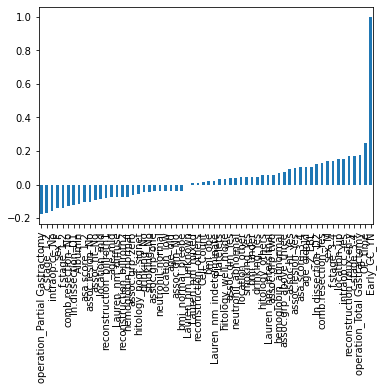

In [6]:
print(df.corr()['Early_CC_YN'].sort_values(ascending=False))
df.corr()['Early_CC_YN'].sort_values().plot(kind='bar')
plt.show()

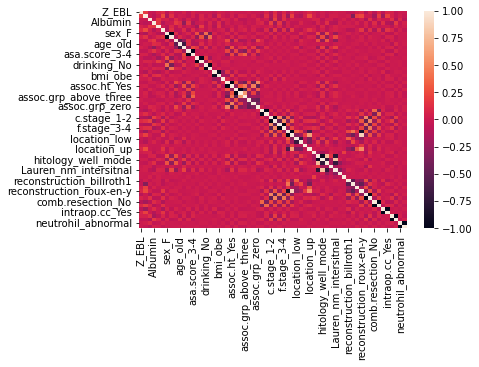

In [7]:
sns.heatmap(df.corr())
plt.show()

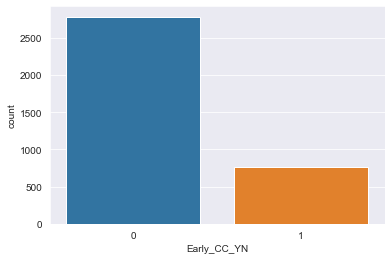

In [8]:
sns.set_style('darkgrid')
sns.countplot(x='Early_CC_YN', data=df)
plt.show()

In [ ]:
#x_year_list1 = [2014,2015,2016,2017,2018,2019]
#y_year_list1 = [2020,2021]

#x_year_list2 = [2015,2016,2017,2018,2019,2020]
#y_year_list2 = [2014,2021]

In [ ]:
#train1 = df[df['OP_year'].isin(x_year_list1)]
#test1  = df[df['OP_year'].isin(y_year_list1)]

#train2 = df[df['OP_year'].isin(x_year_list2)]
#test2 = df[df['OP_year'].isin(y_year_list2)]

In [ ]:
#train_x1 = train1.drop('Early_CC_YN', axis=1).values
#train_y1 = train1['Early_CC_YN'].values

#test_x1 = test1.drop('Early_CC_YN', axis=1).values
#test_y1 = test1['Early_CC_YN'].values

#train_x2 = train2.drop('Early_CC_YN', axis=1).values
#train_y2 = train2['Early_CC_YN'].values

#test_x2 = test2.drop('Early_CC_YN', axis=1).values
#test_y2 = test2['Early_CC_YN'].values

## Feature Scaling

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [26]:
X = df.drop('Early_CC_YN', axis=1).values
y = df['Early_CC_YN'].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=20220423)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True,random_state=20220423)

In [28]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
#X_val = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## logistic

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score

In [30]:
logit = LogisticRegression()
logit.fit(X_train,y_train)

# accuracy
y_pred1 = logit.predict(X_test) # 모델을 통해 예측한 y값 (=예측치)
logit_acc = round(accuracy_score(y_test, y_pred1)  ,4)
print('정확도 : ', logit_acc) 

# confusion matrix
logit_cf = confusion_matrix(y_test, y_pred1)
logit_cf

# 정밀도, 재현율, f1 score
precision = round(precision_score(y_test, y_pred1),4)
recall = round(recall_score(y_test, y_pred1),4)
f1 = round(f1_score(y_test, y_pred1),4)

print('정밀도 : ', precision, '/ 재현율 : ', recall, '/ f1 score : ', f1)

정확도 :  0.7953
정밀도 :  0.5632 / 재현율 :  0.214 / f1 score :  0.3101


/Users/jun/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators = 20, criterion = 'gini', random_state =0)
classifier1.fit(X_train, y_train)

In [ ]:
print('Ridge Regression Train Score is : ' , classifier1.score(X_train, y_train))
print('Ridge Regression Test Score is : ' , classifier1.score(X_test, y_test))

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

In [ ]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)


total=sum(sum(confusion_matrix))

ppv = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
print('ppv : ', ppv )

npv = confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
print('npv : ', npv)

In [ ]:
from sklearn.metrics import roc_curve, auc #for model evaluation
from matplotlib import pyplot
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for RandomForestClassifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

## XGBClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn import metrics
# Creating model object
model_xgb = XGBClassifier(use_label_encoder=False,eval_metric='logloss')
model_xgb.fit(X_train, y_train)

In [ ]:
print('model_xgb Train Score is : ' , model_xgb.score(X_train, y_train))
print('model_xgb Test Score is : ' , model_xgb.score(X_test, y_test))

In [ ]:
y_pred1 = model_xgb.predict(X_test)
y_pred1[:10]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix #for model evaluation
confusion_matrix2=confusion_matrix(y_test,y_pred1)
confusion_matrix2

In [ ]:
from sklearn.metrics import plot_confusion_matrix
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred1)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=model_xgb.classes_)
disp.plot()
plt.show()

In [ ]:
# mean_absolute_error
from sklearn.metrics import mean_absolute_error
meanabs =mean_absolute_error(y_test, y_pred1)
# mean_squared_error
from sklearn.metrics import mean_squared_error
meansq =mean_squared_error(y_test, y_pred1)
# median_absolute_error
from sklearn.metrics import median_absolute_error
medianab =median_absolute_error(y_test, y_pred1)

In [ ]:
print("The mean_absolute_error",meanabs)
print("The mean_Squre_error",meansq)
print("The Medain_absolute_error",medianab)

In [ ]:
total=sum(sum(confusion_matrix2))

sensitivity = confusion_matrix2[0,0]/(confusion_matrix2[0,0]+confusion_matrix2[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix2[1,1]/(confusion_matrix2[1,1]+confusion_matrix2[0,1])
print('Specificity : ', specificity)

In [ ]:
total=sum(sum(confusion_matrix2))

ppv = confusion_matrix2[0,0]/(confusion_matrix2[0,0]+confusion_matrix2[0,1])
print('ppv : ', ppv )

npv = confusion_matrix2[1,1]/(confusion_matrix2[1,0]+confusion_matrix2[1,1])
print('npv : ', npv)

In [ ]:
from sklearn.metrics import roc_curve, auc #for model evaluation
from matplotlib import pyplot
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(y_test,y_pred1)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for XGBClassifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

## Construct Layer

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [24]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

Metal device set to: Apple M1 Pro


2022-04-24 23:11:53.214581: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-24 23:11:53.214945: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [25]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',patience=25,verbose=1)

In [ ]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=450, verbose=1,callbacks=[early_stop])

In [ ]:
mod_loss=pd.DataFrame(model.history.history)
mod_loss.plot()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
y_prob = model.predict(X_test, verbose=0) 
predictions = y_prob.argmax(axis=-1)
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print("The Accuracy Score : ",round(accuracy_score(y_test,predictions),2))

In [ ]:
parameters = {'C': [1,2,3,4,5,6], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

svc_model = SVC()

clf = GridSearchCV(svc_model, parameters)
print("Searching for best hyperparameters ...")
clf.fit(x_train, y_train)
print(f'Best Hyperparameters: {clf.best_params_}')

y_pred = clf.predict(x_val)
model_comparison['SVC'] = [accuracy_score(y_val,y_pred), f1_score(y_val,y_pred, average='weighted')]
print('\n')
print(classification_report(y_val,y_pred, zero_division=1, digits=3))